In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [3]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
#checking the dataset distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [5]:
#seprating the dependent and independent variable
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [6]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)

In [7]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaler_x, Y, train_size = 0.80, stratify = Y, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model building, predictions and odds ratio

In [8]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [9]:
classifier.fit(x_train, y_train)
pred_values = classifier.predict(x_test)
pred_probabilities = classifier.predict_proba(x_test)

In [10]:
pred_values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
pred_probabilities

array([[0.6752637 , 0.3247363 ],
       [0.37740495, 0.62259505],
       [0.86739274, 0.13260726],
       ...,
       [0.52276703, 0.47723297],
       [0.50710239, 0.49289761],
       [0.62209202, 0.37790798]])

# Evaluation metrics

In [12]:
#accuracy
classifier.score(x_test, y_test)

0.7188491164476665

In [13]:
#precision
from sklearn.metrics import precision_score
Precision = precision_score(y_test, pred_values)
Precision

0.37285902503293805

In [14]:
#Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, pred_values)
Recall

0.6619883040935672

In [15]:
#f1_score
f1 = 2 /((1/Precision) + (1/Recall))
f1

0.47703329119258325

In [16]:
from sklearn.metrics import f1_score
f_1 = f1_score(y_test, pred_values)
f_1

0.47703329119258325

In [17]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
prec, rec, f01, suppoert = PRF_summary(y_test, pred_values)

In [18]:
prec

array([0.90020718, 0.37285903])

In [19]:
rec

array([0.73250913, 0.6619883 ])

In [20]:
f01

array([0.80774593, 0.47703329])

In [21]:
suppoert

array([3559,  855], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
k = classification_report(y_test, pred_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3559
           1       0.37      0.66      0.48       855

    accuracy                           0.72      4414
   macro avg       0.64      0.70      0.64      4414
weighted avg       0.80      0.72      0.74      4414



# Plotting the precision recall curve

In [25]:
# gathering precision recall scores for various thresholds
from sklearn.metrics import precision_recall_curve as prs
prec_points, rec_points, threshold_points = prs(y_test, pred_probabilities[ :,1])
prec_points.shape, rec_points.shape, threshold_points.shape


((4415,), (4415,), (4414,))

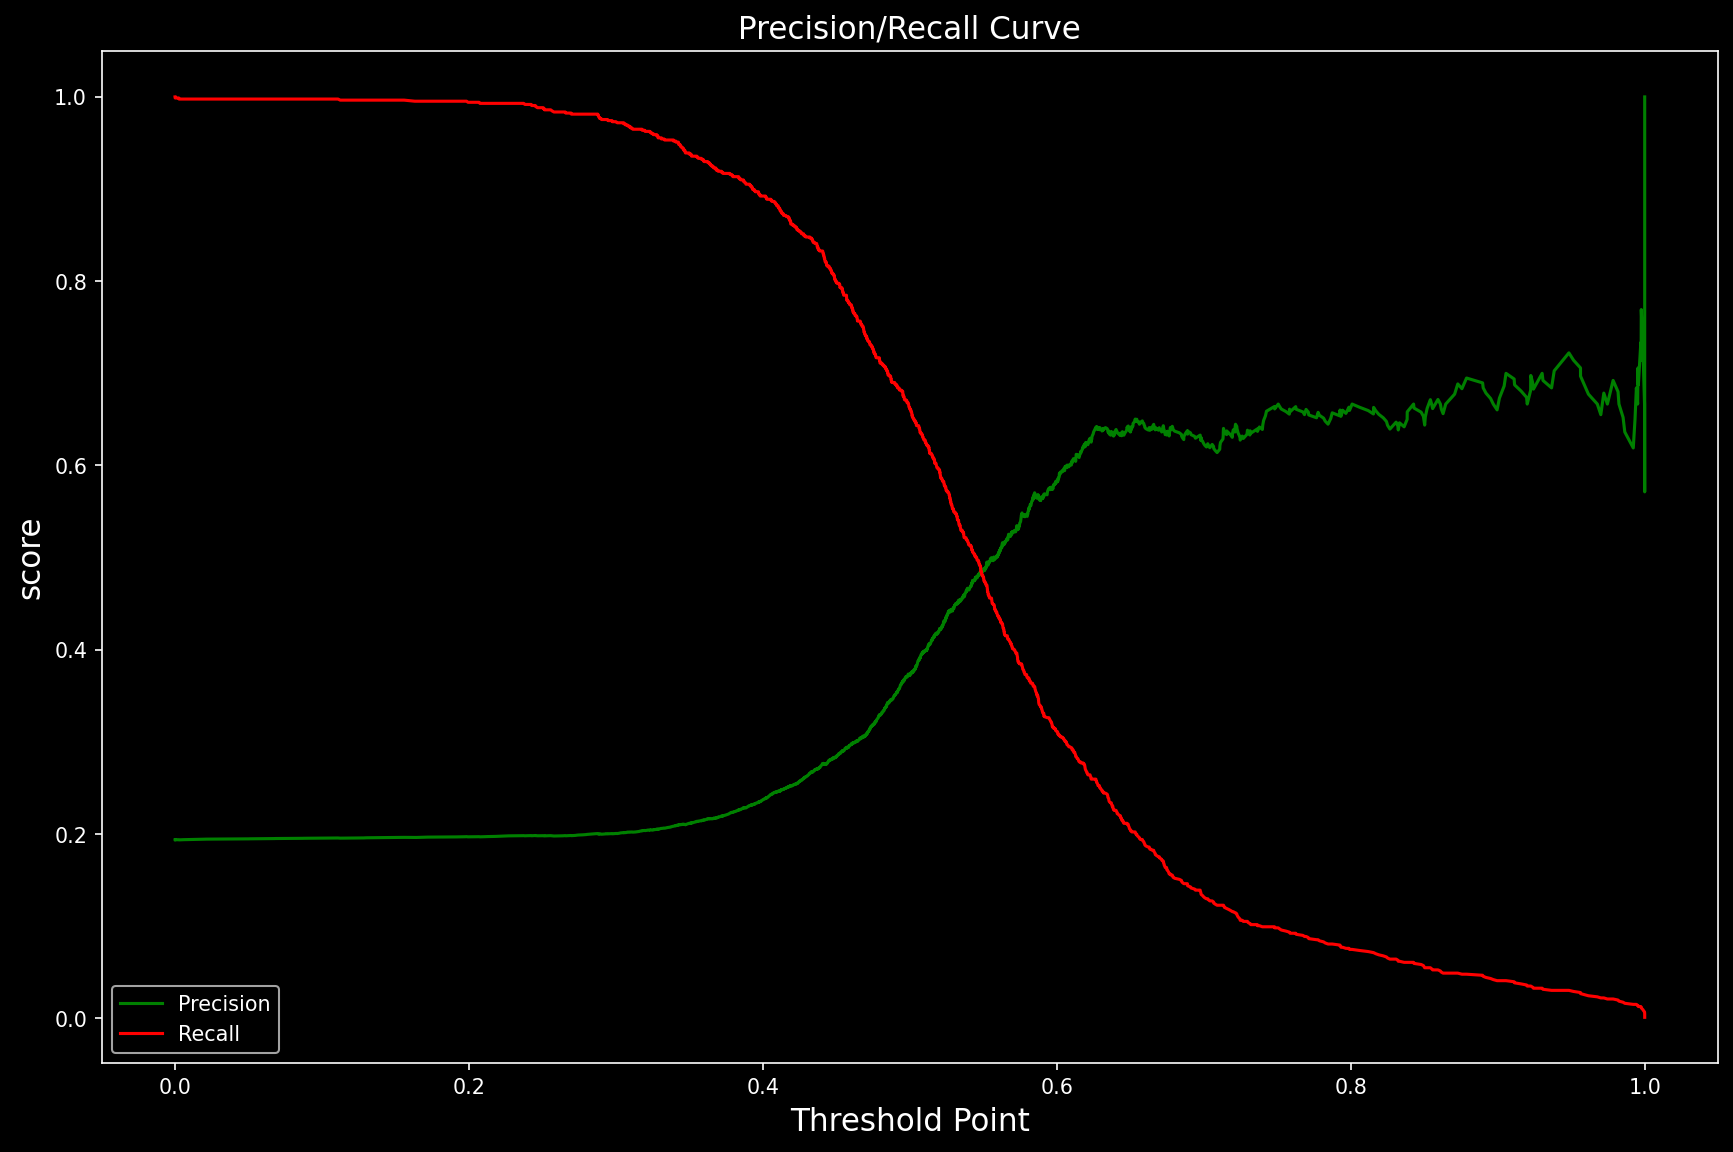

In [27]:
plt.figure(dpi = 149, figsize = (14, 9))
plt.plot(threshold_points, prec_points[:-1], color = 'green', label = 'Precision')
plt.plot(threshold_points, rec_points[:-1], color = 'red',label = 'Recall')
plt.xlabel('Threshold Point', fontsize = 15)
plt.ylabel('score', fontsize = 15)
plt.title('Precision/Recall Curve', fontsize = 15)
plt.legend()
plt.show()

# AUC - ROC Curve

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, pred_probabilities[:,1])

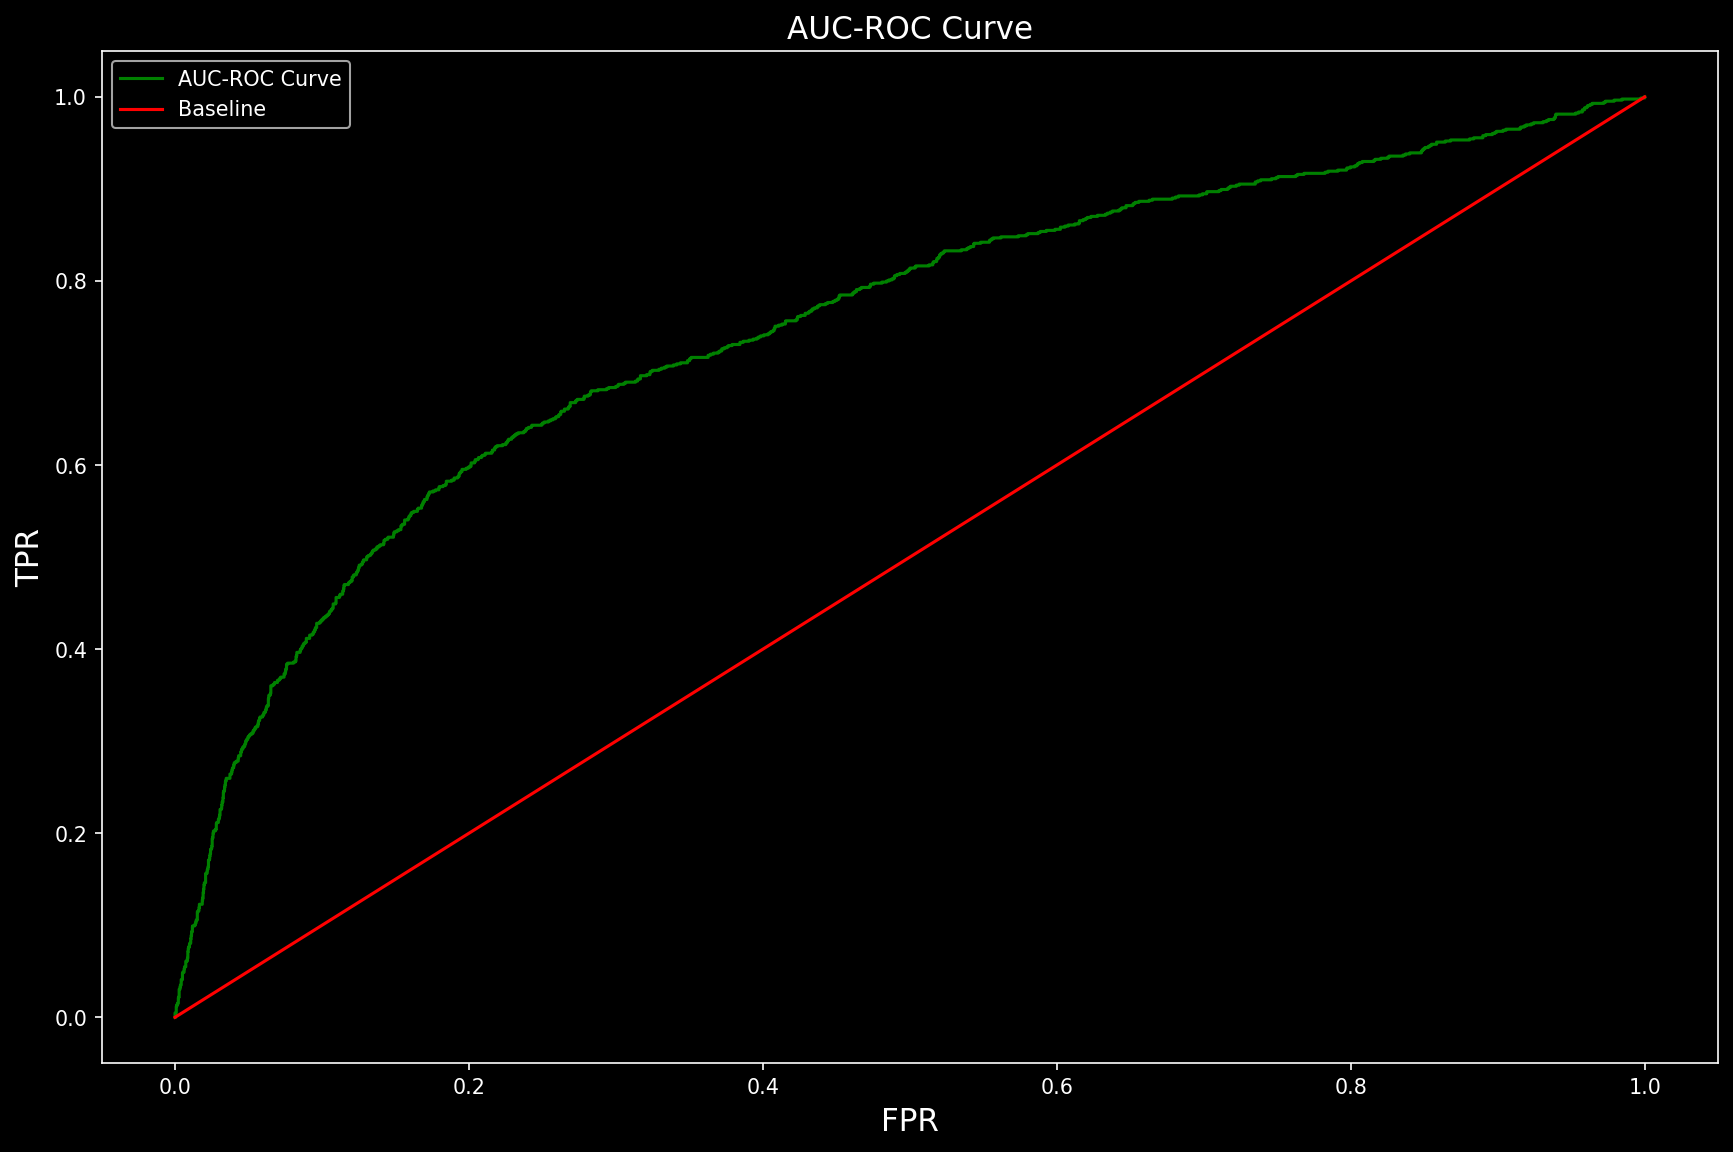

In [29]:
plt.figure(dpi = 149, figsize = (14, 9))
plt.plot(fpr, tpr, color = 'green', label = 'AUC-ROC Curve')
plt.plot([0,1], [0,1], color = 'red', label = 'Baseline')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC Curve', fontsize = 15)
plt.legend()
plt.show()

# COEFFicients plot

In [30]:
#arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coef_plot = pd.DataFrame({'coefficients' : c, 'Variable': x})
coef_plot = coef_plot.sort_values( by = 'coefficients')
coef_plot.head()

,coefficients,Variable
9,-1.858350,current_balance
17,-0.523605,current_month_balance
13,-0.326202,current_month_credit
10,-0.308599,previous_month_end_balance
18,-0.282572,previous_month_balance


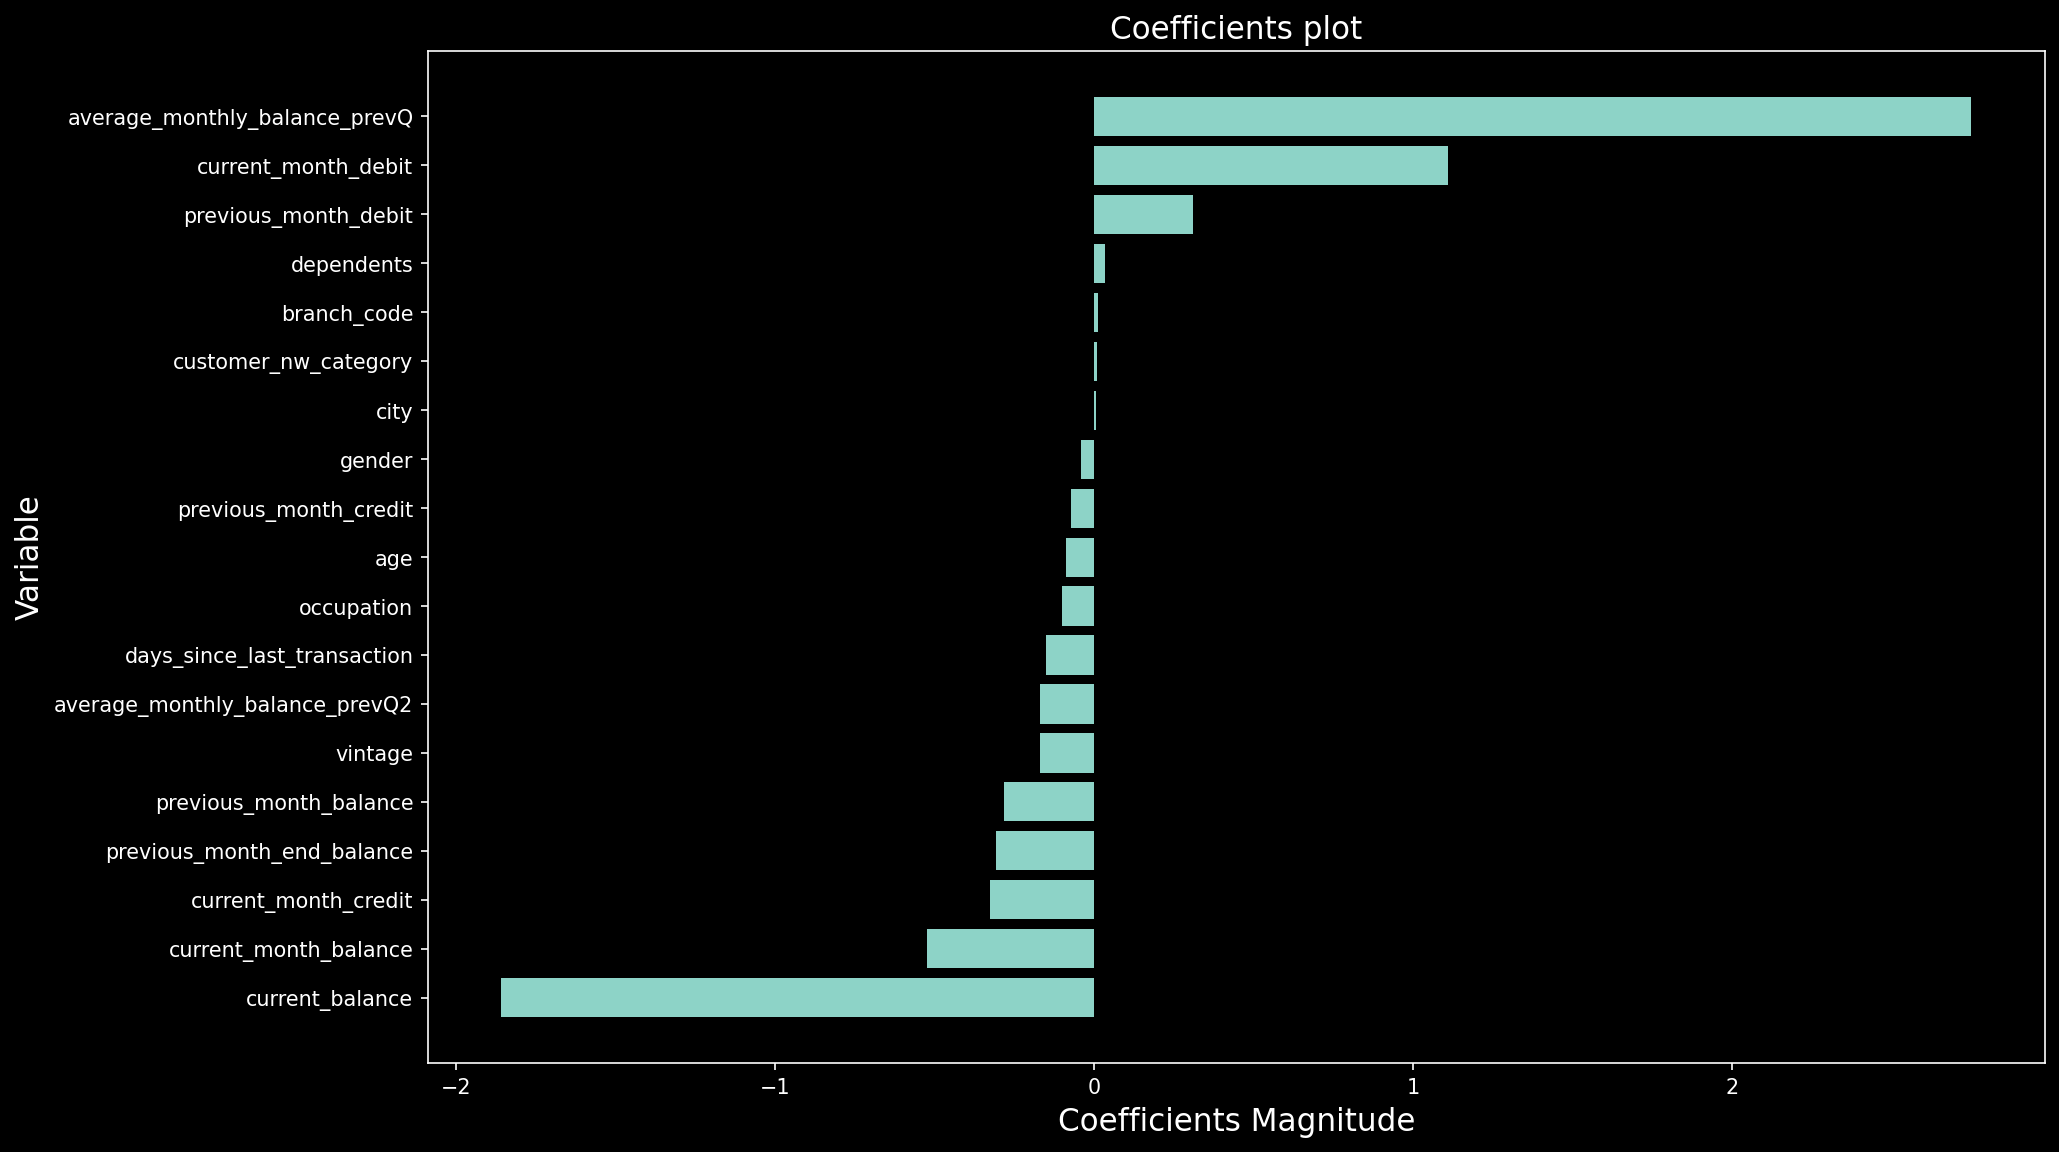

In [33]:
plt.figure(dpi = 149, figsize = (14, 9))
plt.barh(coef_plot['Variable'], coef_plot['coefficients'])
plt.xlabel('Coefficients Magnitude', fontsize = 15)
plt.ylabel('Variable', fontsize = 15)
plt.title('Coefficients plot', fontsize = 15)
#plt.legend()
plt.show()